<a href="https://colab.research.google.com/github/SubhamMohanty187/Data-Science/blob/main/Projects/Phising_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [403]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [404]:
df1 = pd.read_csv("/content/Phising_Training_Dataset.csv")
df = df1.copy()
df.shape

(8955, 32)

In [405]:
df.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [406]:
df.columns

Index(['key', 'having_IP', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8955 entries, 0 to 8954
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   key                          8955 non-null   int64
 1   having_IP                    8955 non-null   int64
 2   URL_Length                   8955 non-null   int64
 3   Shortining_Service           8955 non-null   int64
 4   having_At_Symbol             8955 non-null   int64
 5   double_slash_redirecting     8955 non-null   int64
 6   Prefix_Suffix                8955 non-null   int64
 7   having_Sub_Domain            8955 non-null   int64
 8   SSLfinal_State               8955 non-null   int64
 9   Domain_registeration_length  8955 non-null   int64
 10  Favicon                      8955 non-null   int64
 11  port                         8955 non-null   int64
 12  HTTPS_token                  8955 non-null   int64
 13  Request_URL                  8955 non-null   int

In [408]:
df.isna().sum()

key                            0
having_IP                      0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [409]:
df.nunique()

key                            8955
having_IP                         2
URL_Length                        3
Shortining_Service                2
having_At_Symbol                  2
double_slash_redirecting          2
Prefix_Suffix                     2
having_Sub_Domain                 3
SSLfinal_State                    3
Domain_registeration_length       2
Favicon                           2
port                              2
HTTPS_token                       2
Request_URL                       2
URL_of_Anchor                     3
Links_in_tags                     3
SFH                               3
Submitting_to_email               2
Abnormal_URL                      2
Redirect                          2
on_mouseover                      2
RightClick                        2
popUpWidnow                       2
Iframe                            2
age_of_domain                     2
DNSRecord                         2
web_traffic                       3
Page_Rank                   

In [410]:
X = df[['having_IP', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report']]
y = df['Result']

In [411]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from collections import Counter

In [412]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

In [413]:
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [414]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_val)
# what are scores for the features
feature = {}
for i in range(len(fs.scores_)):
  feature[i] = fs.scores_[i]

  # if fs.scores_[i] >= 0.01:
  #   feature.append(i)

	# print('Feature %d: %f' % (i, fs.scores_[i]))

In [415]:
feature

{0: 0.0,
 1: 0.013199558322212646,
 2: 0.004467101293042397,
 3: 0.0017111454970430984,
 4: 0.0,
 5: 0.08545214016699587,
 6: 0.08046174789434746,
 7: 0.34297379310512466,
 8: 0.028173169725339564,
 9: 0.011227047308178584,
 10: 0.012352552318602772,
 11: 0.0,
 12: 0.02391470556386932,
 13: 0.3404932712193376,
 14: 0.028059815122666087,
 15: 0.028587275138945545,
 16: 3.63741986553201e-05,
 17: 0.0,
 18: 0.012814795100313026,
 19: 0.002850551052991701,
 20: 0.0058799797906572415,
 21: 0.0,
 22: 0.009646800727783678,
 23: 0.00515313346316959,
 24: 0.006738274564459079,
 25: 0.07675974086719184,
 26: 0.018276555861706845,
 27: 0.012621238827748682,
 28: 0.0058524084846056645,
 29: 0.012360962606392967}

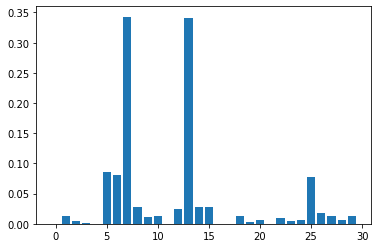

In [416]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [417]:
for j in range(4):
  X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_val)
  for i in range(len(fs.scores_)):
    feature[i] += fs.scores_[i]

In [418]:
feature

{0: 0.031508683328746345,
 1: 0.026994091864074532,
 2: 0.012748126150111894,
 3: 0.026848801827075164,
 4: 0.004449284401963238,
 5: 0.4314430783410299,
 6: 0.4052002338667049,
 7: 1.7370162098132083,
 8: 0.10891275346181462,
 9: 0.016738518336913755,
 10: 0.03220752617420297,
 11: 0.034683788122858106,
 12: 0.15759440687297754,
 13: 1.6735433608300248,
 14: 0.1483375186219027,
 15: 0.110739665478093,
 16: 0.0018473914331396113,
 17: 0.026562116569406324,
 18: 0.018813589934818742,
 19: 0.0319342247741532,
 20: 0.015080177841004794,
 21: 0.007729726652452085,
 22: 0.03332112475734661,
 23: 0.043935505975977396,
 24: 0.027699127864052153,
 25: 0.405772349101164,
 26: 0.04900869779889683,
 27: 0.0703259401913312,
 28: 0.010495119825381316,
 29: 0.03872341658881817}

In [419]:
for i in feature:
  feature[i] /= 5

In [420]:
feature

{0: 0.006301736665749269,
 1: 0.005398818372814906,
 2: 0.0025496252300223786,
 3: 0.005369760365415033,
 4: 0.0008898568803926476,
 5: 0.08628861566820598,
 6: 0.08104004677334098,
 7: 0.34740324196264166,
 8: 0.02178255069236292,
 9: 0.003347703667382751,
 10: 0.006441505234840594,
 11: 0.006936757624571621,
 12: 0.031518881374595506,
 13: 0.334708672166005,
 14: 0.02966750372438054,
 15: 0.022147933095618598,
 16: 0.00036947828662792226,
 17: 0.005312423313881265,
 18: 0.003762717986963748,
 19: 0.006386844954830639,
 20: 0.0030160355682009587,
 21: 0.001545945330490417,
 22: 0.006664224951469322,
 23: 0.00878710119519548,
 24: 0.005539825572810431,
 25: 0.0811544698202328,
 26: 0.009801739559779366,
 27: 0.01406518803826624,
 28: 0.002099023965076263,
 29: 0.0077446833177636345}

In [421]:
final ={}
for i in feature:
  if feature[i] >= 0.01:
    final[i] = feature[i]

final


{5: 0.08628861566820598,
 6: 0.08104004677334098,
 7: 0.34740324196264166,
 8: 0.02178255069236292,
 12: 0.031518881374595506,
 13: 0.334708672166005,
 14: 0.02966750372438054,
 15: 0.022147933095618598,
 25: 0.0811544698202328,
 27: 0.01406518803826624}

In [422]:
X = df[['Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH','web_traffic']]
y = df['Result']

In [423]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

Training Accuracy

In [424]:
from sklearn.svm import LinearSVC

regressor = LinearSVC()
regressor.fit(X_train, y_train)

regressor.score(X_train,y_train)

0.9207083599234206

In [425]:
y_predict = regressor.predict(X_val)

In [426]:
Accuracy_score = []
Algorithm = []

In [427]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_val, y_predict))

0.922590249348716


In [428]:
Accuracy_score.append(accuracy_score(y_val, y_predict))
Algorithm.append("SVC")

In [429]:
for i in Algorithm, Accuracy_score:
    print(i,end=',')

['SVC'],[0.922590249348716],

Decision Tree Classifier

In [430]:
from sklearn.tree import DecisionTreeClassifier

regressor = DecisionTreeClassifier()
regressor.fit(X_train, y_train)

y_predict = regressor.predict(X_val)

Accuracy_score.append(accuracy_score(y_val, y_predict))
Algorithm.append("Decision Tree Classifier")

In [431]:
for i in Algorithm, Accuracy_score:
    print(i,end=',')

['SVC', 'Decision Tree Classifier'],[0.922590249348716, 0.9434313360625233],

Random Forrest

In [432]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier()
regressor.fit(X_train, y_train)

y_predict = regressor.predict(X_val)

Accuracy_score.append(accuracy_score(y_val, y_predict))
Algorithm.append("Random Forrest Classifier")

In [433]:
for i in Algorithm, Accuracy_score:
    print(i,end=',')

['SVC', 'Decision Tree Classifier', 'Random Forrest Classifier'],[0.922590249348716, 0.9434313360625233, 0.945292147376256],

XGBoost

In [434]:
import xgboost as xgb
regressor = xgb.XGBClassifier()
regressor.fit(X_train, y_train)

y_predict = regressor.predict(X_val)

Accuracy_score.append(accuracy_score(y_val, y_predict))
Algorithm.append("XGB Classifier")

In [435]:
for i in Algorithm, Accuracy_score:
    print(i,end=',')

['SVC', 'Decision Tree Classifier', 'Random Forrest Classifier', 'XGB Classifier'],[0.922590249348716, 0.9434313360625233, 0.945292147376256, 0.9411983624860439],

In [436]:
compare_df = pd.DataFrame(list(zip(Algorithm,Accuracy_score)), columns=['Algorithm','Accuracy_Score'])
compare_df

,Algorithm,Accuracy_Score
0,SVC,0.922590
1,Decision Tree Classifier,0.943431
2,Random Forrest Classifier,0.945292
3,XGB Classifier,0.941198


HyperParameter Tuning for Random Forrest

In [437]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [438]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [439]:
rf = RandomForestClassifier()

In [440]:
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 5, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [441]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [442]:
hp_rf = rf_random.best_estimator_
hp_rf

RandomForestClassifier(bootstrap=False, max_depth=20, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=5)

In [443]:
cl = hp_rf
cl.fit(X_train, y_train)
# Predicting the Test Set Results
predict_value = cl.predict(X_val)

In [444]:
print(accuracy_score(y_val, predict_value))

0.9430591737997767


In [445]:
X_test = pd.read_csv("/content/Phising_Testing_Dataset.csv")
X_test.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,21338,1,1,1,1,1,1,-1,1,-1,...,1,1,1,1,1,1,1,-1,0,1
1,21339,1,-1,1,1,1,-1,0,-1,1,...,1,1,1,-1,-1,0,-1,-1,0,1
2,21340,1,-1,1,1,1,-1,0,0,-1,...,-1,-1,-1,1,-1,1,-1,1,1,-1
3,21341,-1,-1,-1,1,-1,-1,-1,-1,1,...,1,-1,-1,1,-1,1,-1,1,1,-1
4,21342,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,0,1


In [446]:
pk = X_test['key']

# X_test.drop('key',axis=1,inplace=True)
X_test = X_test[['Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH','web_traffic']]

In [447]:
X_test.shape

(2100, 9)

In [448]:
y_test = cl.predict(X_test)

In [449]:
X_test['Result'] = y_test
X_test['Result']
X_test['Result'].value_counts()

 1    1149
-1     951
Name: Result, dtype: int64

In [450]:
Final = [pk , X_test['Result']]
headers=["key","Result"]
df3 = pd. concat(Final, axis=1, keys=headers)

In [451]:
df3.to_csv("Final.csv")